# Exploratory Data Analysis on Suicide Rates between 1985 and 2016

#### From star celebrities, respected chefs and renowned designers like Robin Williams, Anthony Bourdain and Kate Spade, I realized that suicidal thoughts do not discrimate based on success. It is even scarier to know that mental health problems can hide in plain sight, even to those suffering from it.

#### Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. This is alarming considering there must be many more attempts to end one's life.

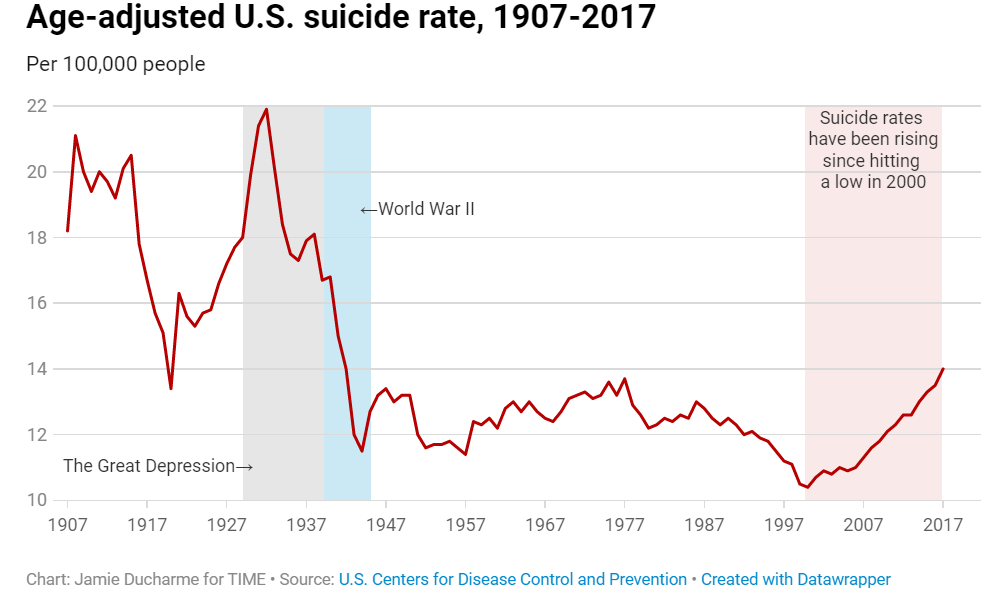

In [3]:
from IPython.display import Image
Image("US-Suicide-Rate.PNG")

Let's now look at the graph above. It was taken from an article from Time magazine about how suicide rates have been on the rise since the 21st century in the United States. Seeing that positive slope after reaching its lowest peak since 1907 picked my curiosity into diving deeper into the causes behind such a sharp increase. I hope I can learn more about the factors influencing suicide around the world.

## 1. Problem definition
> Why is it that suicide rates are on the rise in the 21st Century? Is it just in the U.S.?  

## 2. Data
I looked for suicide rate data on Kaggle and found an overview from 1985 to 2016. The data was pulled from a collection of datasets from the WHO, the UN development program, the World Bank and another Kaggle dataset available publicly.
Here is the link to the dataset: 
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

## 3. Evaluation
> The goal of this notebook will be to analytically deconstruct the possible factors behind suicide around the world from the 1985 to 2016 through data analysis.

## 4. Features
1. Country
2. Year
3. Sex (male or female)
4. Age (range) 
5. Suicide Count
6. Population
7. Suicide/100K population
8. Country-year (code number ie. Albania1987)
9. HDI for Year (Human development Index)
10. GDP for Year (\$)
11. GDP per Capita (\$)
12. Generation 
 
## References:
Here is the link to the Time magazine article:
https://time.com/5609124/us-suicide-rate-increase/ 


### Data Exploration

In [1]:
# Import all the tools we need

# Regular exploratory data analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df = pd.read_csv("master.csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [3]:
df.shape

(27820, 12)

In [6]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [8]:
# Datatype of each feature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


 ### What's missing from the data and how do we deal with it?

In [9]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

We can see just above that the "HDI for year" feature has close to 19456 null values out of 27820 rows (which is roughly 70% of all entries).

Since this notebook is about analyzing the data and not forecasting, there is no need to change change the dataset since it does not interfere with the analysis.

### General information on dataset

In [10]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


(6.5, -0.5)

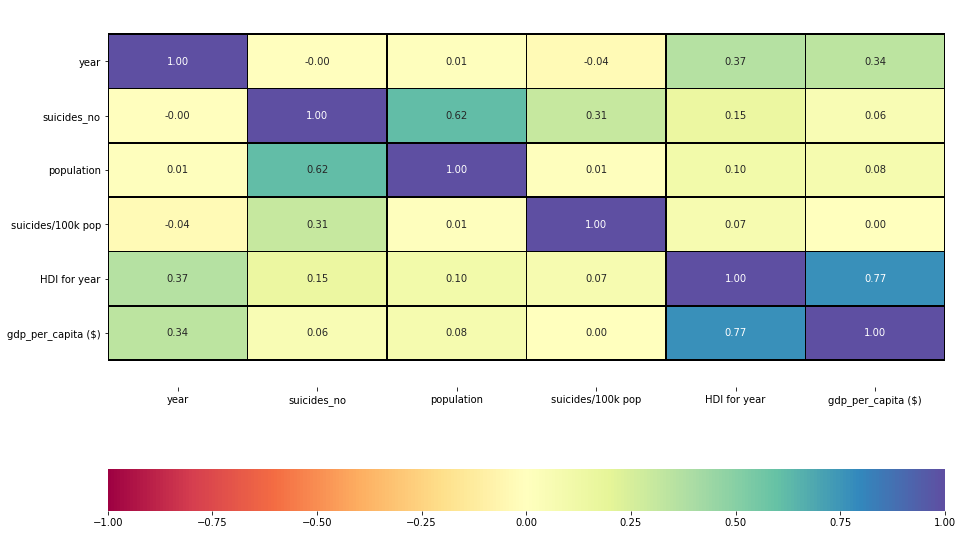

In [66]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                vmin=-1, 
                vmax=1, 
                center= 0,
                linecolor='black',
                fmt=".2f",
                cmap= 'Spectral',
                cbar_kws= {'orientation': 'horizontal'}
                );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5)

The correlation matrix only tells us that there is a strong correlation between HDI for year and GDP per capita, which share common indicators like PCI (per capita income). 

Another strong correlation was the suicide number with the population number. As the population is bigger, the count of suicides will also be higher as percentages have a bigger influence on higher numbers.

After having an overview of the features, I will now start analyzing deeper into the data with clear data visualization. I will be using Tableau to showcase my findings.  

## Gender Ratio

In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1594677385299' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicideratiopergender&#47;Suicideratiopergender&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Suicideratiopergender&#47;Suicideratiopergender' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicideratiopergender&#47;Suicideratiopergender&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1594677385299');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

There is a clear overwhelming majority of suicides being males. What's the reason behind it? According to a Healthy Debate article, there are a few predominant factors affecting this large ratio of male suicide:

1. Men are more likely to use lethal and extreme means to attempt suicide and do not seek care as much.
2. Strong masculine ideals sees getting psychological help negatively
3. Middle-aged men (45 to 54) have a sense of predictability, meaning and purpose in their jobs, marriages or role as a father. Job losses, becoming single, widowed or divorced forms a sense of alienation.

source: https://healthydebate.ca/2017/08/topic/male-suicide

## Suicides by Age Group

In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1594675364469' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;SuicideRates_15946748931740&#47;Suicidenumbersthroughouttheyearsbyagegroup&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SuicideRates_15946748931740&#47;Suicidenumbersthroughouttheyearsbyagegroup' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;SuicideRates_15946748931740&#47;Suicidenumbersthroughouttheyearsbyagegroup&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1594675364469');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

It was stated in the Healthy Debate article above that middle-aged men consisted of a higher rate of suicides. At least in the environment that I grew up in, we believed that suicide affected younger generations more often, especially Millenials and Generation Z. Even though this graph clears up that misconception, there is still a clear universal trend between all age groups. When suicide numbers go out, all age groups are affected by it and vice-versa. The magnitude is also proportionate to the increase and decrease in numbers.

## Suicides per Generation

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1594757659837' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicidespergeneration&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Suicidespergeneration&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicidespergeneration&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1594757659837');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Both graphs above are accessible only in fullscreen. Simply from these graphs, Millenials and Generation Z are low in numbers of suicide, but we need to take into consideration that these generations have not lived their lives as long as the older generations, which includes all the challenges that comes at later ages (such as the midlife crisis and how it relates to the high suicide rates at that age). The high number in the Boomers generations should be delved into more deeply, considering they are not the oldest generation on the list.

## Suicide rates around the world

In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1594767089681' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicideworldmap&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;Suicideworldmap&#47;Dashboard2?:language=en&amp;:embed=y&amp;:display_count=y&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicideworldmap&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1594767089681');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

For both geographic visualization maps, Russia, the United States and Japan stand out the most. Russia and Japan consistently have high numbers of suicide even though they differ extremely in culture and economics. The U.S. has the highest median number, while making up in reduced numbers of suicides/100K population. Half of European counties and Central Asia are also heavily affected on the suicides per population metric. These metrics show that this is indeed a global issue.